# Q4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(100000)

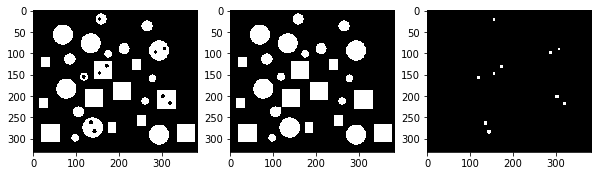

In [10]:
im = cv2.imread("../input_data/objects.png", 0)

binary = (im > 127).astype(np.uint8)

kernel = np.ones((7,9))
solid_im = cv2.dilate(binary, kernel, iterations=1)
solid_im = cv2.erode(solid_im, kernel, iterations=1)


kernel = np.ones((6,6))
hole_im = solid_im - binary
hole_im = cv2.erode(hole_im, kernel, iterations=1)
hole_im = cv2.dilate(hole_im, kernel, iterations=1)

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(binary, cmap='gray')
plt.subplot(132)
plt.imshow(solid_im, cmap='gray')
plt.subplot(133)
plt.imshow(hole_im, cmap='gray')
plt.show()


# 1. Objects with one or more holes

In [11]:
def dfs(x, y, im, out, visited):
    if(x<0 or x>=im.shape[0]):  
        return 0
    if(y<0 or y>=im.shape[1]):
        return 0
    if (visited[x,y]==1):
        return 0
    
    visited[x,y] = 1
    
    if(im[x,y] == 1):
        out[x,y] = 1
        dfs(x+1, y, im, out, visited)
        dfs(x, y+1, im, out, visited)
        dfs(x, y-1, im, out, visited)
        dfs(x-1, y, im, out, visited)  
    
    return 0

def conn4(temp,im):
    number=0
    
    out = np.zeros(im.shape)
    visited = np.zeros(im.shape)    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if(visited[i,j]==0 and temp[i,j]==1):
                number = number+1
                dfs(i, j, im, out, visited)
    
    return number, out

Number of objects with one or more holes: 6


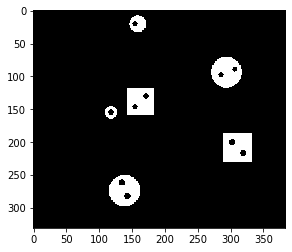

In [14]:
num_holes, holes = conn4(hole_im, solid_im)

biq = np.logical_and(holes, binary).astype(np.uint8)
plt.imshow(biq, cmap='gray')
print("Number of objects with one or more holes:", num_holes)

# 2. Square Objects

In [5]:
def filtered(im,filt):
    w, h = im.shape
    
    padded_im = np.zeros((w+2, h+2))
    padded_im[1:-1, 1:-1] = im

    out = np.zeros((w, h))
    for i in range(1, w+1):
        for j in range(1, h+1):
            size = np.sum(np.equal(padded_im[i-1:i+2, j-1: j+2], filt))
            if  size == filt.size:
                out[i-1, j-1] = 1
    return out

Number of square objects: 11


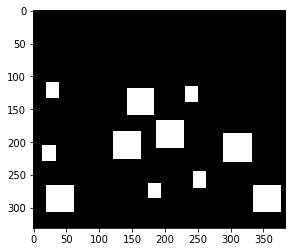

In [15]:
kernel1 = np.array([[0,0,0],[0, 1, 1],[0, 1, 1]])

structure = filtered(solid_im, kernel1)

num_square, square = conn4(structure, solid_im)
plt.imshow(square, cmap='gray')
print("Number of square objects:", num_square)

# 3. Square Objects with holes

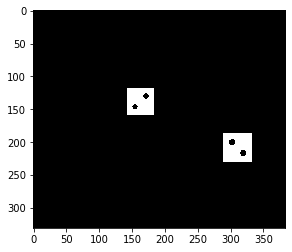

In [18]:
square_holes = np.logical_and(square,biq)

num, hole_square = conn4(square_holes, square_holes)

plt.imshow(square_holes, cmap='gray')
plt.show()

# 4. Circular Objects with no Holes

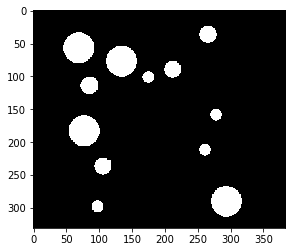

In [21]:
kernel1 = np.array([[1,1,0],[1, 1, 0],[1, 0, 0]])


structure = filtered(solid_im, kernel1)

num_circles, circles = conn4(structure, solid_im-holes)
plt.imshow(circles, cmap='gray')
plt.show()